In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

,income,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,77,Local-gov,177550,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818,0,14,United-States
1,0,40,Self-emp-inc,475322,Bachelors,13,Separated,Craft-repair,Own-child,White,Male,0,0,50,United-States
2,1,29,Self-emp-not-inc,341672,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0,1564,50,India
3,0,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
4,0,22,Private,306967,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0,48,Private,79646,11th,7,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
22788,0,26,Self-emp-not-inc,118523,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
22789,0,36,Private,301614,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
22790,0,33,?,335625,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States


In [8]:
data = pd.read_csv('..\\data\\traindata.csv')
labels = pd.read_csv('..\\data\\trainlabel.txt', header=None, names=['label'])['label']
data.insert(0, 'income', labels)

# one-hot encoding
cat_col = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
num_col = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
encode_data = pd.get_dummies(data, columns=cat_col)
encode_data.drop(['education', 'fnlwgt'], axis=1, inplace=True)

# nomalization
for col in num_col:
    encode_data[col] = (encode_data[col] - encode_data[col].mean()) / encode_data[col].std()

encode_data

,income,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,2.821444,1.131656,0.383292,-0.214685,-2.148626,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0,0.108875,1.131656,-0.145057,-0.214685,0.775195,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,-0.697564,-0.416177,-0.145057,3.690712,0.775195,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.182188,-0.416177,-0.145057,-0.214685,-0.036978,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,-1.210753,-0.029219,-0.145057,-0.214685,-1.255236,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0,0.695377,-1.190094,-0.145057,-0.214685,0.775195,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22788,0,-0.917502,-0.416177,-0.145057,-0.214685,-0.036978,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22789,0,-0.184375,-0.416177,-0.145057,-0.214685,-0.036978,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22790,0,-0.404313,-0.029219,-0.145057,-0.214685,-0.036978,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.7)
for train_index, test_index in sss.split(encode_data, encode_data['income']):
    trainx, trainy = encode_data.drop('income', axis=1).iloc[train_index], encode_data['income'].iloc[train_index]
    testx, testy = encode_data.drop('income', axis=1).iloc[test_index], encode_data['income'].iloc[test_index]

In [19]:
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log_loss', max_iter=100)
lr.fit(trainx, trainy)


SGDClassifier(loss='log_loss', max_iter=100)

In [16]:
from sklearn.metrics import roc_auc_score,precision_recall_curve,classification_report,roc_curve

pred =lr.predict_proba(testx)[:,1]
pred_labels = lr.predict(testx)
#ROC
print(roc_auc_score(testy,pred))
#分类报告
print(classification_report(testy,pred_labels))

0.9021497547409818
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12113
           1       0.75      0.57      0.64      3842

    accuracy                           0.85     15955
   macro avg       0.81      0.75      0.77     15955
weighted avg       0.84      0.85      0.84     15955



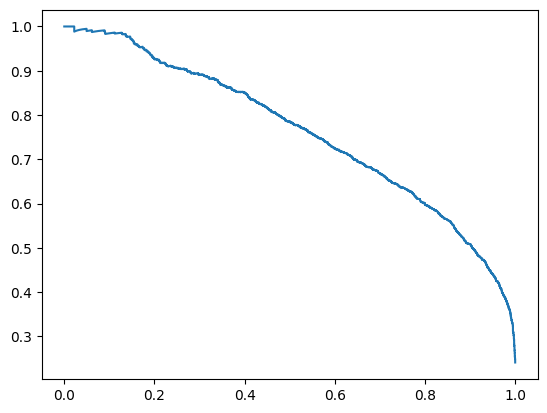

In [17]:
precision,recall,_ =precision_recall_curve(testy,pred)
plt.plot(recall,precision)

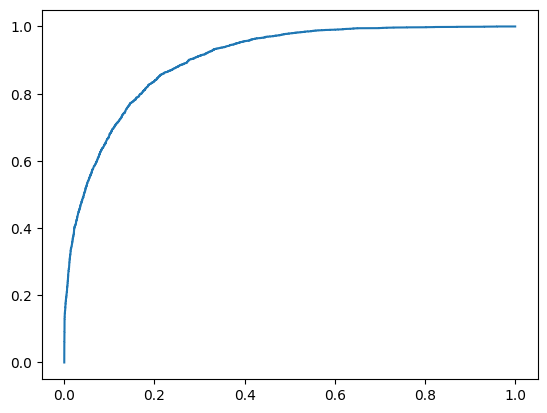

In [18]:
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)